In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import matplotlib.pyplot as plt
import networkx as nx
import pandas as pd


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df=pd.read_csv('/content/drive/MyDrive/olympic_medals.csv')
df.head()

,discipline_title,slug_game,event_title,event_gender,medal_type,participant_type,participant_title,athlete_url,athlete_full_name,country_name,country_code,country_3_letter_code
0,Shooting,tokyo-2020,Trap Mixed Team,Mixed,GOLD,GameTeam,Spain,https://olympics.com/en/athletes/fatima-galvez,Fatima GALVEZ,Spain,ES,ESP
1,Shooting,tokyo-2020,Trap Mixed Team,Mixed,GOLD,GameTeam,Spain,https://olympics.com/en/athletes/alberto-ferna...,Alberto FERNANDEZ,Spain,ES,ESP
2,Shooting,tokyo-2020,Trap Mixed Team,Mixed,SILVER,GameTeam,San Marino,https://olympics.com/en/athletes/alessandra-pe...,Alessandra PERILLI,San Marino,SM,SMR
3,Shooting,tokyo-2020,Trap Mixed Team,Mixed,SILVER,GameTeam,San Marino,https://olympics.com/en/athletes/gian-marco-berti,Gian Marco BERTI,San Marino,SM,SMR
4,Shooting,tokyo-2020,Trap Mixed Team,Mixed,BRONZE,GameTeam,United States of America,https://olympics.com/en/athletes/madelynn-ann-...,Madelynn Ann BERNAU,United States of America,US,USA


In [ ]:

countries=[]
colors=[]
i=0
colors.append("orange")
while len(countries)!=10:
    if df['country_code'][i] not in countries:
        colors.append("green")
        countries.append(df['country_code'][i])
    i+=1

In [ ]:
g=nx.Graph()
g.add_node("Countries")
sizes=[200]
colors=["green"]
for i in range(len(countries)):
    g.add_node(countries[i])
    sizes.append(200)
    colors.append("orange")
edges=[("Countries", i) for i in countries]

In [ ]:
medals=[]

for i in range(10):
    medals.append([0,0,0])

for i in range(len(df)):
    if df['country_code'][i] in countries:
        if df['medal_type'][i]=="GOLD":
            medals[countries.index(df['country_code'][i])][0]+=1
        elif df['medal_type'][i]=="SILVER":
            medals[countries.index(df['country_code'][i])][1]+=1
        elif df['medal_type'][i]=="BRONZE":
            medals[countries.index(df['country_code'][i])][2]+=1

In [ ]:
medals[1][1]=3
medals[0][1]=86

In [ ]:
for i in range(len(countries)):
    g.add_node(medals[i][0])
    sizes.append(5*medals[i][0])
    edges.append((countries[i], medals[i][0]))
    colors.append("gold")
    g.add_node(medals[i][1])
    sizes.append(5*medals[i][1])
    edges.append((countries[i], medals[i][1]))
    colors.append("silver")
    g.add_node(medals[i][2])
    sizes.append(5*medals[i][2])
    edges.append((countries[i], medals[i][2]))
    colors.append("brown")

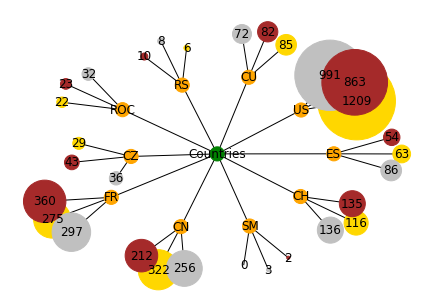

In [ ]:
g.add_edges_from(edges)
nx.draw(g, node_color=colors, node_size=sizes,  with_labels=True)
plt.show()